<a href="https://colab.research.google.com/github/laxmiharikumar/deeplearning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for regression - what we use is - predicting a numerical variable based on a combination of some other variables

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

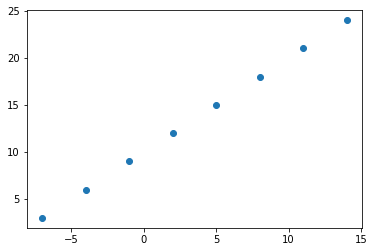

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create lables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with tensorflow

1. **Creating a model** - Define the input and output layers as well as the hidden layers for the deep learning model
2. **Compiling a model** - define the loss function (the fn that tells our model how wrong it is), optimizer (tells our  model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - find patterns between X and y (features and labels)

In [9]:
# Set the random seed
tf.random.set_seed(42)

# Create a model using the sequential API
# 1 hidden layer 
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
# Mean Absolute Error, #SGD
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(X,y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 577ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
#Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred ## Very bad prediction o/p. Op is 12 insted of 17

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create the model

1. Creating a model - Add more layers, Add more hidden units (neurons) within each layer, change the activation fn of each layer
2. Compiling a model - change the optimization function, learning rate of optimization fn,
3. Fitting a model - fit for more epochs (leave it training for longer)  or give the model more data to learn from


In [12]:
# Lets rebuild our model

# In the first attempt we are just increasing the number of epochs

#1. Create our model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 268ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [13]:
#Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [14]:
# Try changing the optimizer now

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 346ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5691 - mae: 10.5691
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5646 - mae: 10.5646
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5601 - mae: 10.5601
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5556 - mae: 10.5556
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5511 - mae: 10.5511
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5466 - mae: 10.5466
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5421 - mae: 10.5421
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5376 - mae: 10.5376
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5331 - mae: 10.5331
Epoch 11/100
1/1 [==============================] - 0s 5

In [15]:
#Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[16.014063]], dtype=float32)

In [16]:
# Try adding another layer now

model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 422ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9553 - mae: 13.9553
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8701 - mae: 13.8701
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.7849 - mae: 13.7849
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6997 - mae: 13.6997
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6147 - mae: 13.6147
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5298 - mae: 13.5298
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4451 - mae: 13.4451
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3605 - mae: 13.3605
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2761 - mae: 13.2761
Epoch 11/100
1/1 [==============================] - 0s 6m

In [17]:
#Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[22.091452]], dtype=float32)

In [18]:
# Change back to SGD


model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 300ms/step - loss: 13.5267 - mae: 13.5267
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9594 - mae: 12.9594
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.3983 - mae: 12.3983
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8281 - mae: 11.8281
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2463 - mae: 11.2463
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6465 - mae: 10.6465
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3938 - mae: 9.3938
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7211 - mae: 8.7211
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.0110 - mae: 8.0110
Epoch 11/100
1/1 [==============================] - 0s 7ms/ste

In [19]:
#Try and make a prediction using the model  
# Results better with Adam than SGD
y_pred = model.predict([17.0])
y_pred

array([[31.824467]], dtype=float32)

## Evaluating the model

In practice a typical workflow you go thru while building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ... 
```

When it comes to evaluation, there are 3 words you should memorize

> "Visualize, Visualize, Visualize"

It's a good idea to visualize
* The data - what data are we working with ? what does it look like
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* the predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [20]:
# Make a bifgger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

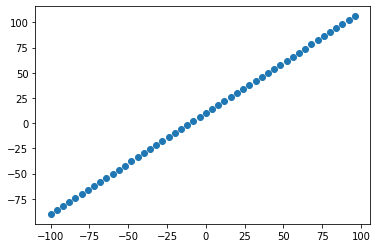

In [22]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets ...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [23]:
# Check the length of the sata we are working with
tf.size(X) # Also we can use len(X)

<tf.Tensor: shape=(), dtype=int32, numpy=50>

In [24]:
# Split into train and test
X_train = X[:40] # first 40 are training data
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train)


(40, 40)

## Visualize training and testing data

Now we've got our data in training and test sets... let's visualize it

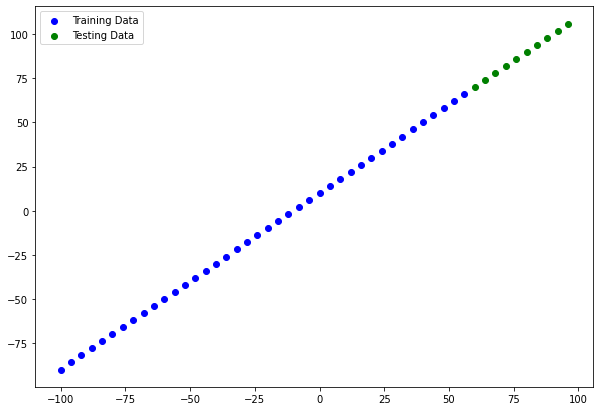

In [25]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [26]:
# Build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
# model.fit(X_train,y_train,epochs=100)

### Visualizing the model

In [27]:
#model.summary() #gives an error
#ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [28]:
# Let's create a model which builds automatically by defining the input_shape argument
# One input for 1 output and hence shape =1 
tf.random.set_seed(42)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
        tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")                     
], name="model_1")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains 
* Non-trainable - these parameters aren't updated during training (this is typical when you bring in already learnt parameters from other models during transfer learning)

In [30]:
# Let's fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

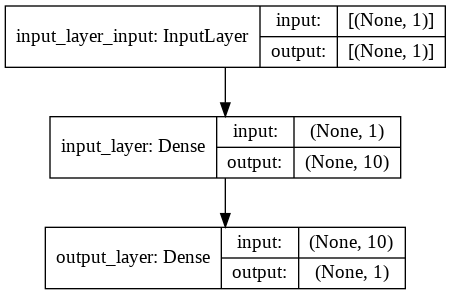

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, plot y_test vs y_pred (ground truth vs predictions)

In [32]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [34]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compare preds and grnd truth
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels,c="b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels,c="g", label = "Testing data")
  # Plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions" )
  plt.legend();

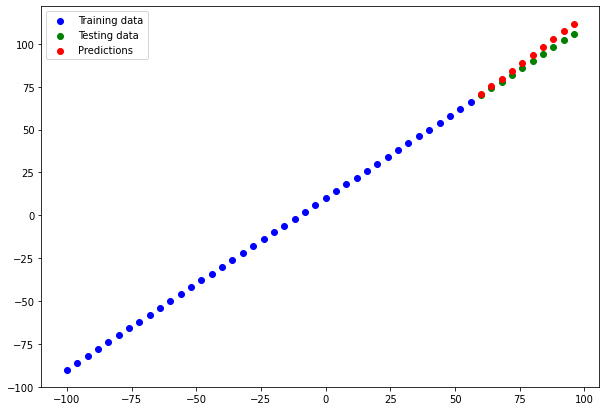

In [35]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance

For regression two main metrics are:
* MAE - on average, how wrong is each of my model's prediction
* MSE - mean square error, "square the average errors"

In [36]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 136ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [37]:
y_test, y_test.shape

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 TensorShape([10]))

In [38]:
y_pred, y_pred.shape

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), (10, 1))

In [39]:
# Calculate the mean absolute error using tf functions
# Note that this function will work only if the shapes are same
# y_pred is an array. convert it to tensor and get rid of the extra dimension
mae = tf.metrics.mean_absolute_error(y_test, (tf.squeeze(tf.constant(y_pred))))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [40]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [41]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
  
def mse(y_true, y_pred):
  return  tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=y_pred)

### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```
1. Get more data - more examples to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this mite come as more layers or more hidden units in each layer
3. Train for longer - give ur model more of a chance to find patterns in the data

Let's do 3 modeling experiments
1. model_1 - 1 layer, trained for 100 epochs
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs

**Build model_1**

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)                       
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

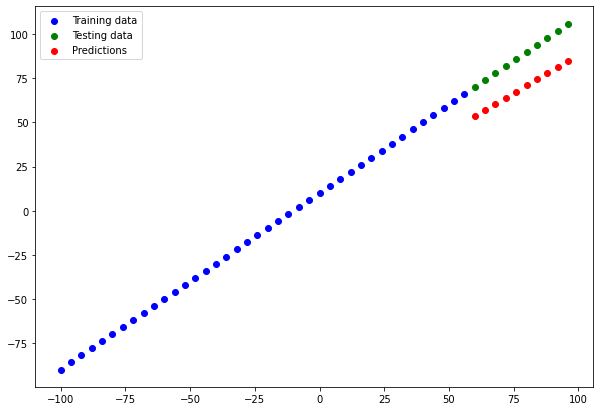

In [43]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [44]:
# Calculate model_1 evaluatiom metrics
mae_1 = mae(y_test, tf.squeeze(tf.constant(y_preds_1)))
mse_1 = mse(y_test, tf.squeeze(tf.constant(y_preds_1)))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**

* 2 dense layers run for 100 epochs

In [45]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
           tf.keras.layers.Dense(10),
           tf.keras.layers.Dense(1)                   
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)


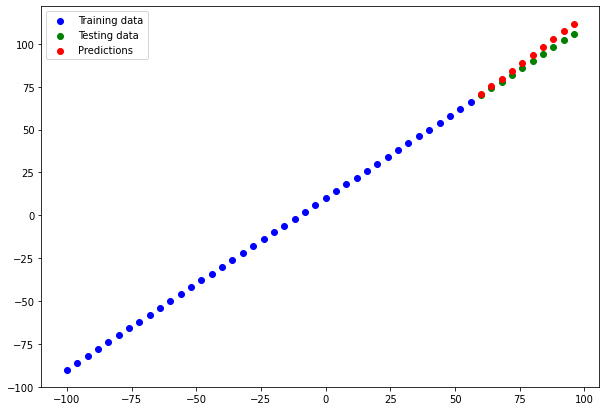

In [46]:
# Make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [47]:
# Calculate model_2 evaluatiom metrics
mae_2 = mae(y_test, tf.squeeze(tf.constant(y_preds_2)))
mse_2 = mse(y_test, tf.squeeze(tf.constant(y_preds_2)))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model_3**

* 2 layers with 500 epochs

In [48]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_3=tf.keras.Sequential([
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

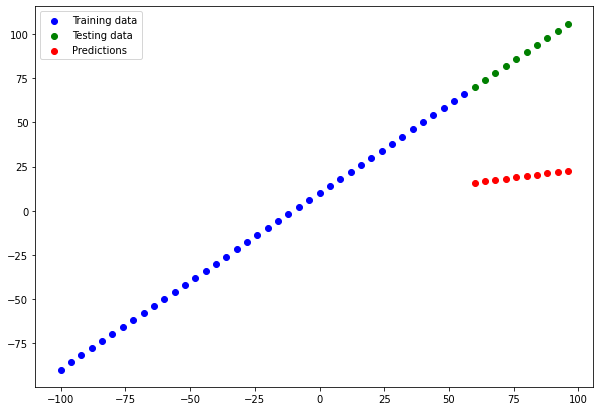

In [49]:
# Make and plot predictions for model_3

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [50]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test,tf.squeeze(tf.constant(y_preds_3)))
mse_3 = mse(y_test,tf.squeeze(tf.constant(y_preds_3)))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments

We've run a few experiments. Now let's compare the results

In [51]:
# Lets compare our models/ outputs using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [52]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments
Luckily there are tools for this

**Resource:**

* Tensorboard - a component of tf libraryto help track modelling experiments
* Weights & Biases - atool for tracking all kinds of machine learning experiements (can be plugged into tensorboard)


## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in web application or a mobile app

There are two main formats to save our model

1. The SavedModel format
2. The HDF5 format

In [53]:
# Save model using SavedModel format

model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [54]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")


## Load the saved model

In [55]:
# Load in a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compare model_2 predictions with loaded_SavedMode_format predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
loaded_SavedModel_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [57]:
# Load in a model using the HDF5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [58]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other resource) from Google Colab

1. Go to Files tab. Rt click on file and click download
2. use the code
3. Save to Google drive

In [59]:
# Download a file from Google Colab
from google.colab import files
#files.download("/content/best_model_HDF5_format.h5")

In [60]:
# Save a file from colab to drive
# !cp /content/best_model_HDF5_format.h5 /content/drive

## A larger example

In [61]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
# Read in the insurance data set
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [63]:
# Some columns are numerical where as soome columns are not numerical
# Convert the non numerical columns to numerical values (numerical encoding)

# One hot encoding is a method to convert categorical variables to numerical variables
# how to one hot encode features in a pandas dataframe. Equivalent of creating 2 columns sex_female and putting 1 in sex_female if female and 0 otherwise. But this takes effort

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [64]:
# NEXT STEPS
# Create X and y values (features and labels)
# Create a training and test sets
# Build a neural network

In [65]:
# Create X
X=insurance_one_hot.drop("charges", axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [66]:
# Create y
y=insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [67]:
# Create train and test data sets for features (X) - manually
# X_train = X[:937]
# X_test=X[937:]
# X_test
# Create train and test data sets for labels (y) manually
# y_train = y[:937]
# y_test = [937;]

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
937,39,24.225,5,1,0,1,0,0,1,0,0
938,18,26.180,2,0,1,1,0,0,0,1,0
939,53,29.480,0,0,1,1,0,0,0,1,0
940,18,23.210,0,0,1,1,0,0,0,1,0
941,50,46.090,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [70]:
# Use scikit 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [71]:
# Build a neural network

# Set the seed
tf.random.set_seed(42)

# Create the model
model_ins = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                 tf.keras.layers.Dense(1)])

# Compile the model
model_ins.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=["mae"])

# Fit the model
model_ins.fit(X_train, y_train, epochs=100, verbose=0)

In [73]:
# Check the evaluation metrics on train data 
model_ins.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 7070.7485 - mae: 7070.7485


[7070.74853515625, 7070.74853515625]

In [74]:
# Check the evaluation metrics on test data
model_ins.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [75]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

In [85]:
## Right now it looks like our model isn't performing well - lets try and improve it

# To improve our model, we could try 2 experiments

#1. Add an extra layer with more hidden units
#2. Train for longer

# Method 1
# Increase number of epochs to 500
tf.random.set_seed(42)

# Create the model
model_ins_1 = tf.keras.Sequential([ 
                      tf.keras.layers.Dense(100),           
                      tf.keras.layers.Dense(10),
                      tf.keras.layers.Dense(1)
])

# Compile the model
model_ins_1.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])


# Fit the model
model_ins_1.fit(X_train, y_train, epochs=100, verbose=0)

In [86]:
# Evaluate the model
model_ins_1.evaluate(X_test, y_test)
## Getting nan - Maybe model is too big anc omplex to learn anything.
# Commenting line with layers 100 if u comment the model will work
# Hence changed the optimizer to Adam made it work

9/9 [==============================] - 0s 2ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [92]:
# Method 2
# Increase number of epochs to 200
tf.random.set_seed(42)

# Create the model
model_ins_2 = tf.keras.Sequential([ 
                      tf.keras.layers.Dense(100),
                      tf.keras.layers.Dense(10),
                      tf.keras.layers.Dense(1)
])

# Compile the model
model_ins_2.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])


# Fit the model
history = model_ins_2.fit(X_train, y_train, epochs=200, verbose=0)

In [94]:
# Evaluate the model
model_ins_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7854


[3488.785400390625, 3488.785400390625]

Text(0.5, 0, 'epoch')

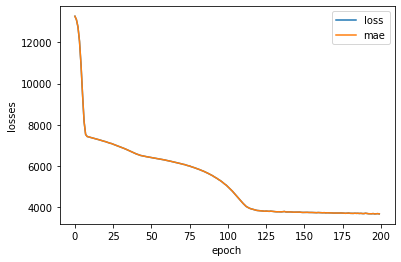

In [97]:
# Plot history (training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("losses")
plt.xlabel("epoch")

How long should we train for?

Answer - it depends. But tensorFlow has a solution -  is EarlyStopping Callback - which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and standardization)

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

* In terms of scaling values neural networks tend to prefer normalization
* If you're not sure which to use, you could try both and see which performs better

In [102]:
# Preprocess data

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
# Check X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


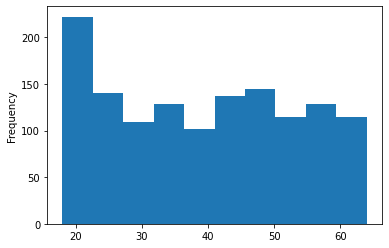

In [99]:
X["age"].plot(kind='hist')

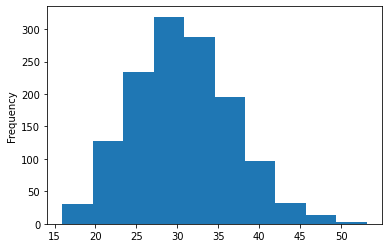

In [100]:
X["bmi"].plot(kind="hist")

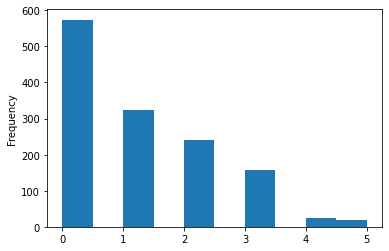

In [101]:
X["children"].plot(kind="hist")

Age goes from 20 to 60, bmi from 15 to 50 and children from 0 to 5
Now we do normalization

Tp prepare our data we can borrow few classes from sklearn

In [104]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))


# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)


# Fit the column transformer to our training data ONLY
ct.fit(X_train)


# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [106]:
# What does our data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [107]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [108]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded!!!

Now let's build a neural network model on it and see how it goes

In [117]:
# Build a neural network model to fit on our normalized data
# Use the model_ins_2 settings

# Set the seed
tf.random.set_seed(42)

# Create the model
insurance_norm_model_1 =  tf.keras.Sequential([
                        tf.keras.layers.Dense(100),                         
                        tf.keras.layers.Dense(10),                                           
                        tf.keras.layers.Dense(1)
])


# Compile the model
insurance_norm_model_1.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

# Fit the model
history = insurance_norm_model_1.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [119]:
# Evaluate the model
insurance_norm_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

When data is normalized, models tend to converge faster